In [1]:
from helper import infer_independent
import calibr8
import numpy
import pandas
import pathlib
import matplotlib.cm
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.ticker as ticker

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# filepaths for data import

In [2]:
unicates_filepath = (pathlib.Path('calibr8_unicates_wells.xlsx'))
BU_filepath = (pathlib.Path('BUs_edit.xlsx'))
results_calibr8 = (pathlib.Path('calibr8_results_edit.xlsx'))

# Pahpshmir, norm. all plates

C:\Users\steier\AppData\Local\Continuum\miniconda3\envs\Amplify\lib\site-packages\calibr8\utils.py:526: UserWarning: Scale/sigma degree >= 2 is quite unusual. Consider a lower value.
  warnings.warn("Scale/sigma degree >= 2 is quite unusual. Consider a lower value.", UserWarning)


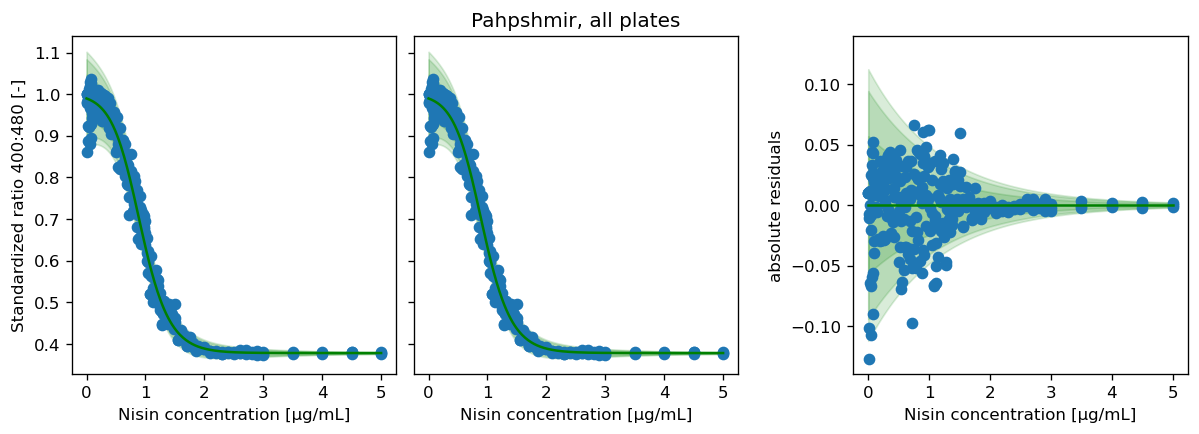

In [3]:
# Define model class
class NisinCalibrationModel(calibr8.BaseAsymmetricLogisticN):
    def __init__(
        self,
        *,
        independent_key: str="Nisin concentration [µg/mL]",
        dependent_key: str="Standardized ratio 400:480 [-]",
        sigma_degree: int=2, # this is just a helper to allow for the exponential sigma
        theta_names= tuple("L_L,L_U,I_x,S,c,I_sigma,L_sigma,k_sigma".split(",")),
    ):
        super().__init__(
            independent_key=independent_key,
            dependent_key=dependent_key,
            sigma_degree=sigma_degree,
            theta_names=theta_names,
        )
    def predict_dependent(self, x, *, theta=None):
        """Predicts the parameters mu and sigma of a normal distribution which
        characterizes the dependent variable given values of the independent variable.

        Parameters
        ----------
        x : array-like
            values of the independent variable
        theta : optional, array-like
            parameter vector of the calibration model:
                5 parameters of asymmetric logistic model for mu
                [sigma_degree] parameters for sigma (lowest degree first)

        Returns
        -------
        mu : array-like
            values for the mu parameter of a normal distribution describing the dependent variable
        sigma : array-like or float
            values for the sigma parameter of a normal distribution describing the dependent variable
        """
        if theta is None:
            theta = self.theta_fitted
        mu = calibr8.asymmetric_logistic(x, theta[:5])
        if self.sigma_degree == 0:
            sigma = theta[-1]
        else:
            sigma = calibr8.exponential(x, theta[5:])
        return mu, sigma


# Load your dataset
df_data = pandas.read_excel("norm_calibr8_Pahpshmir.xlsx")
cal_independent = df_data["Concentration"]
cal_dependent = df_data["norm. mean"]

# Fit the model
Pahpshmirmodel = NisinCalibrationModel()
calibr8.fit_scipy(
    Pahpshmirmodel,
    independent=cal_independent.to_numpy(),
    dependent=cal_dependent.to_numpy(),
    theta_guess=[0.3, 1.05, 1.0, -1.0, 0.1, 0.3, 0.01, 0.8],
    theta_bounds=[
        (0.2, 0.5),
        (0.8, 1.2),
        (0.0, 2.0),
        (-2.0, 0),
        (-1.0, 1.0),
        (0.00001, 0.5),
        (0.00001, 0.2),
        (0.01, 2),
    ],
)

# Plot the residuals
fig, axs = calibr8.plot_model(Pahpshmirmodel)
axs[1].set_title('Pahpshmir, all plates')
#pyplot.show()

save_path = pathlib.Path('Pahpshmir_all_plates_norm.png')
#pyplot.savefig(save_path,dpi=600,  bbox_inches="tight")

In [4]:
df_median_min_max_sorted_index = pandas.read_excel(results_calibr8, 'Tabelle1')

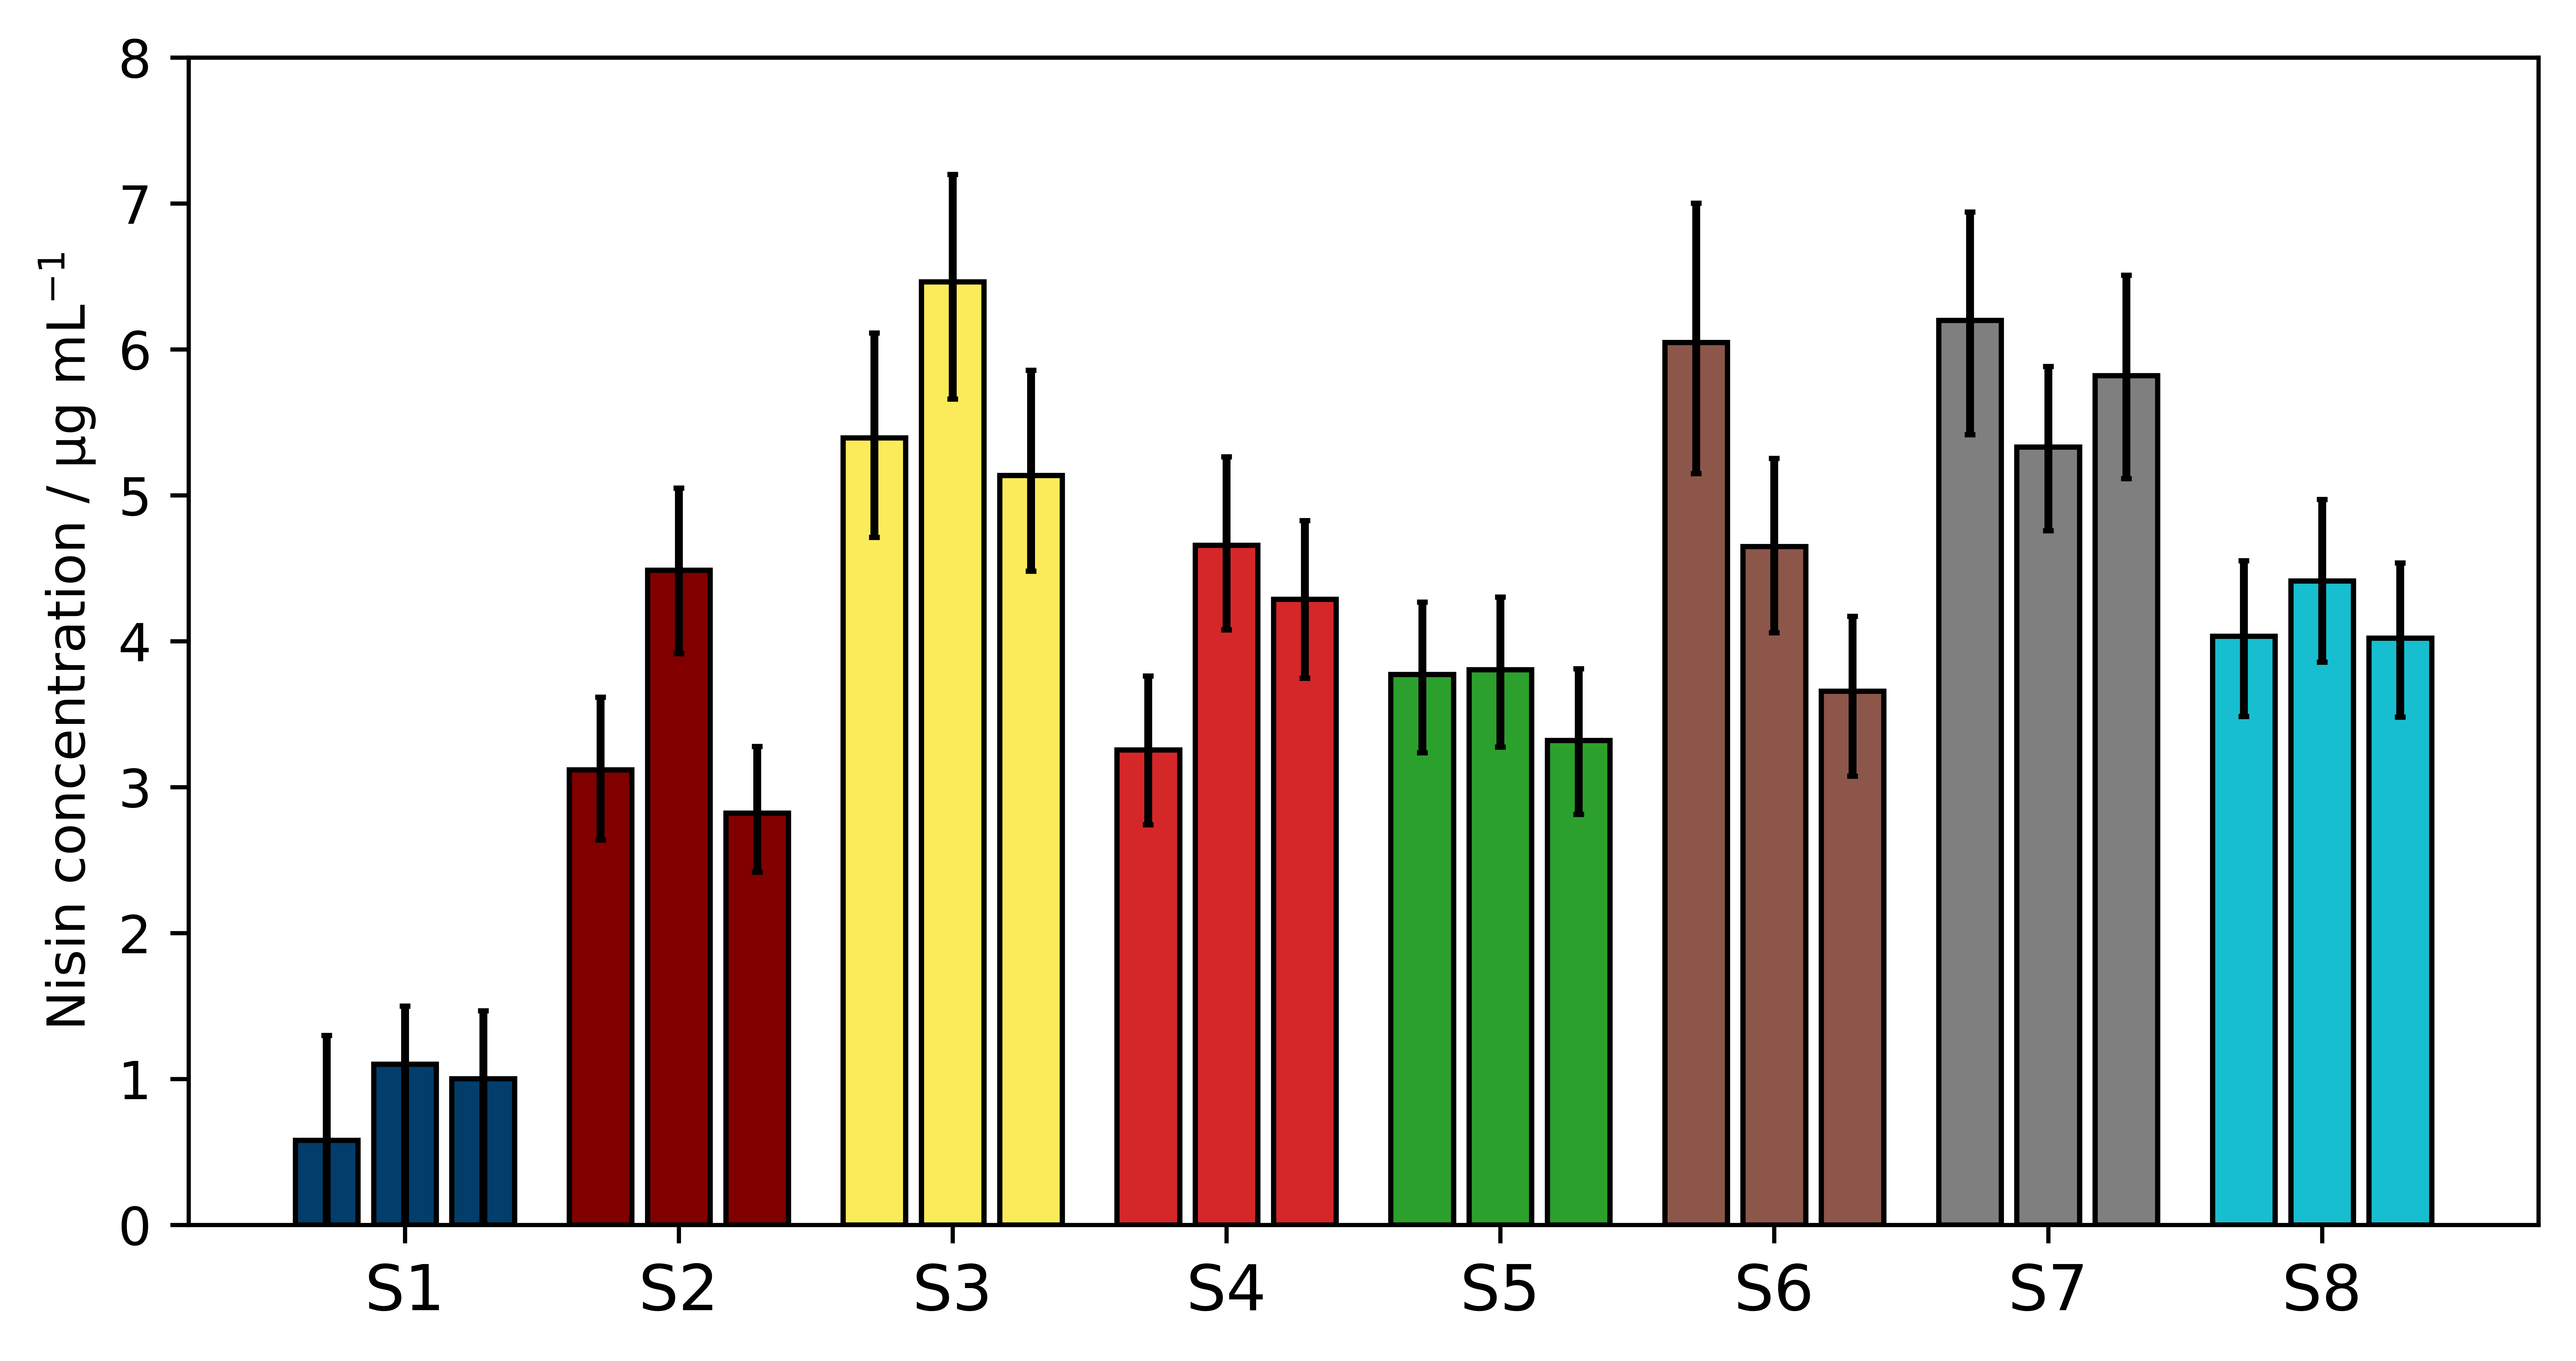

In [5]:
#example for custom visualisation (not edited to fit this specific dataset)

fig, ax = plt.subplots(figsize=(8,4),dpi=1200)

color = ['#023d6b','#023d6b','#023d6b','maroon','maroon','maroon','#faeb5a','#faeb5a','#faeb5a',
         'tab:red','tab:red','tab:red','tab:green','tab:green','tab:green','tab:brown','tab:brown','tab:brown',
         'tab:gray','tab:gray','tab:gray','tab:cyan','tab:cyan','tab:cyan','#adbde3','#adbde3','#adbde3',
         '#af82b9','#af82b9','#af82b9','tab:blue','tab:blue','tab:blue','tab:orange','tab:orange','tab:orange',
         'tab:purple','tab:purple','tab:purple','tab:pink','tab:pink','tab:pink',
         'tab:olive','tab:olive','tab:olive','coral','coral','coral']

#x=numpy.arange(len(df_median_min_max_sorted_index))

labels = ['S1','S2','S3','S4','S5','S6','S7','S8']

x=numpy.array([0,1,2,3.5,4.5,5.5,7,8,9,10.5,11.5,12.5,14,15,16,17.5,18.5,19.5,21,22,23,24.5,25.5,26.5])

ax.bar(x, df_median_min_max_sorted_index['median'], yerr=[df_median_min_max_sorted_index['y_err_min'],df_median_min_max_sorted_index['y_err_max']], capsize=1, edgecolor='black', color=color)
ax.set_ylim(0, 8)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel('Nisin concentration / µg mL$^{-1}$')

ax.set_xticks([1,4.5,8,11.5,15,18.5,22,25.5])
ax.set_xticklabels(labels, rotation=0,
                     fontdict = {'fontsize': 12})

save_path = pathlib.Path('calibr8_results.png')
#pyplot.savefig(save_path,dpi=600,  bbox_inches="tight")

# BUs

In [6]:
BU_list = pandas.read_excel(BU_filepath,'Tabelle2', header=0,index_col=[0,2,3,4])

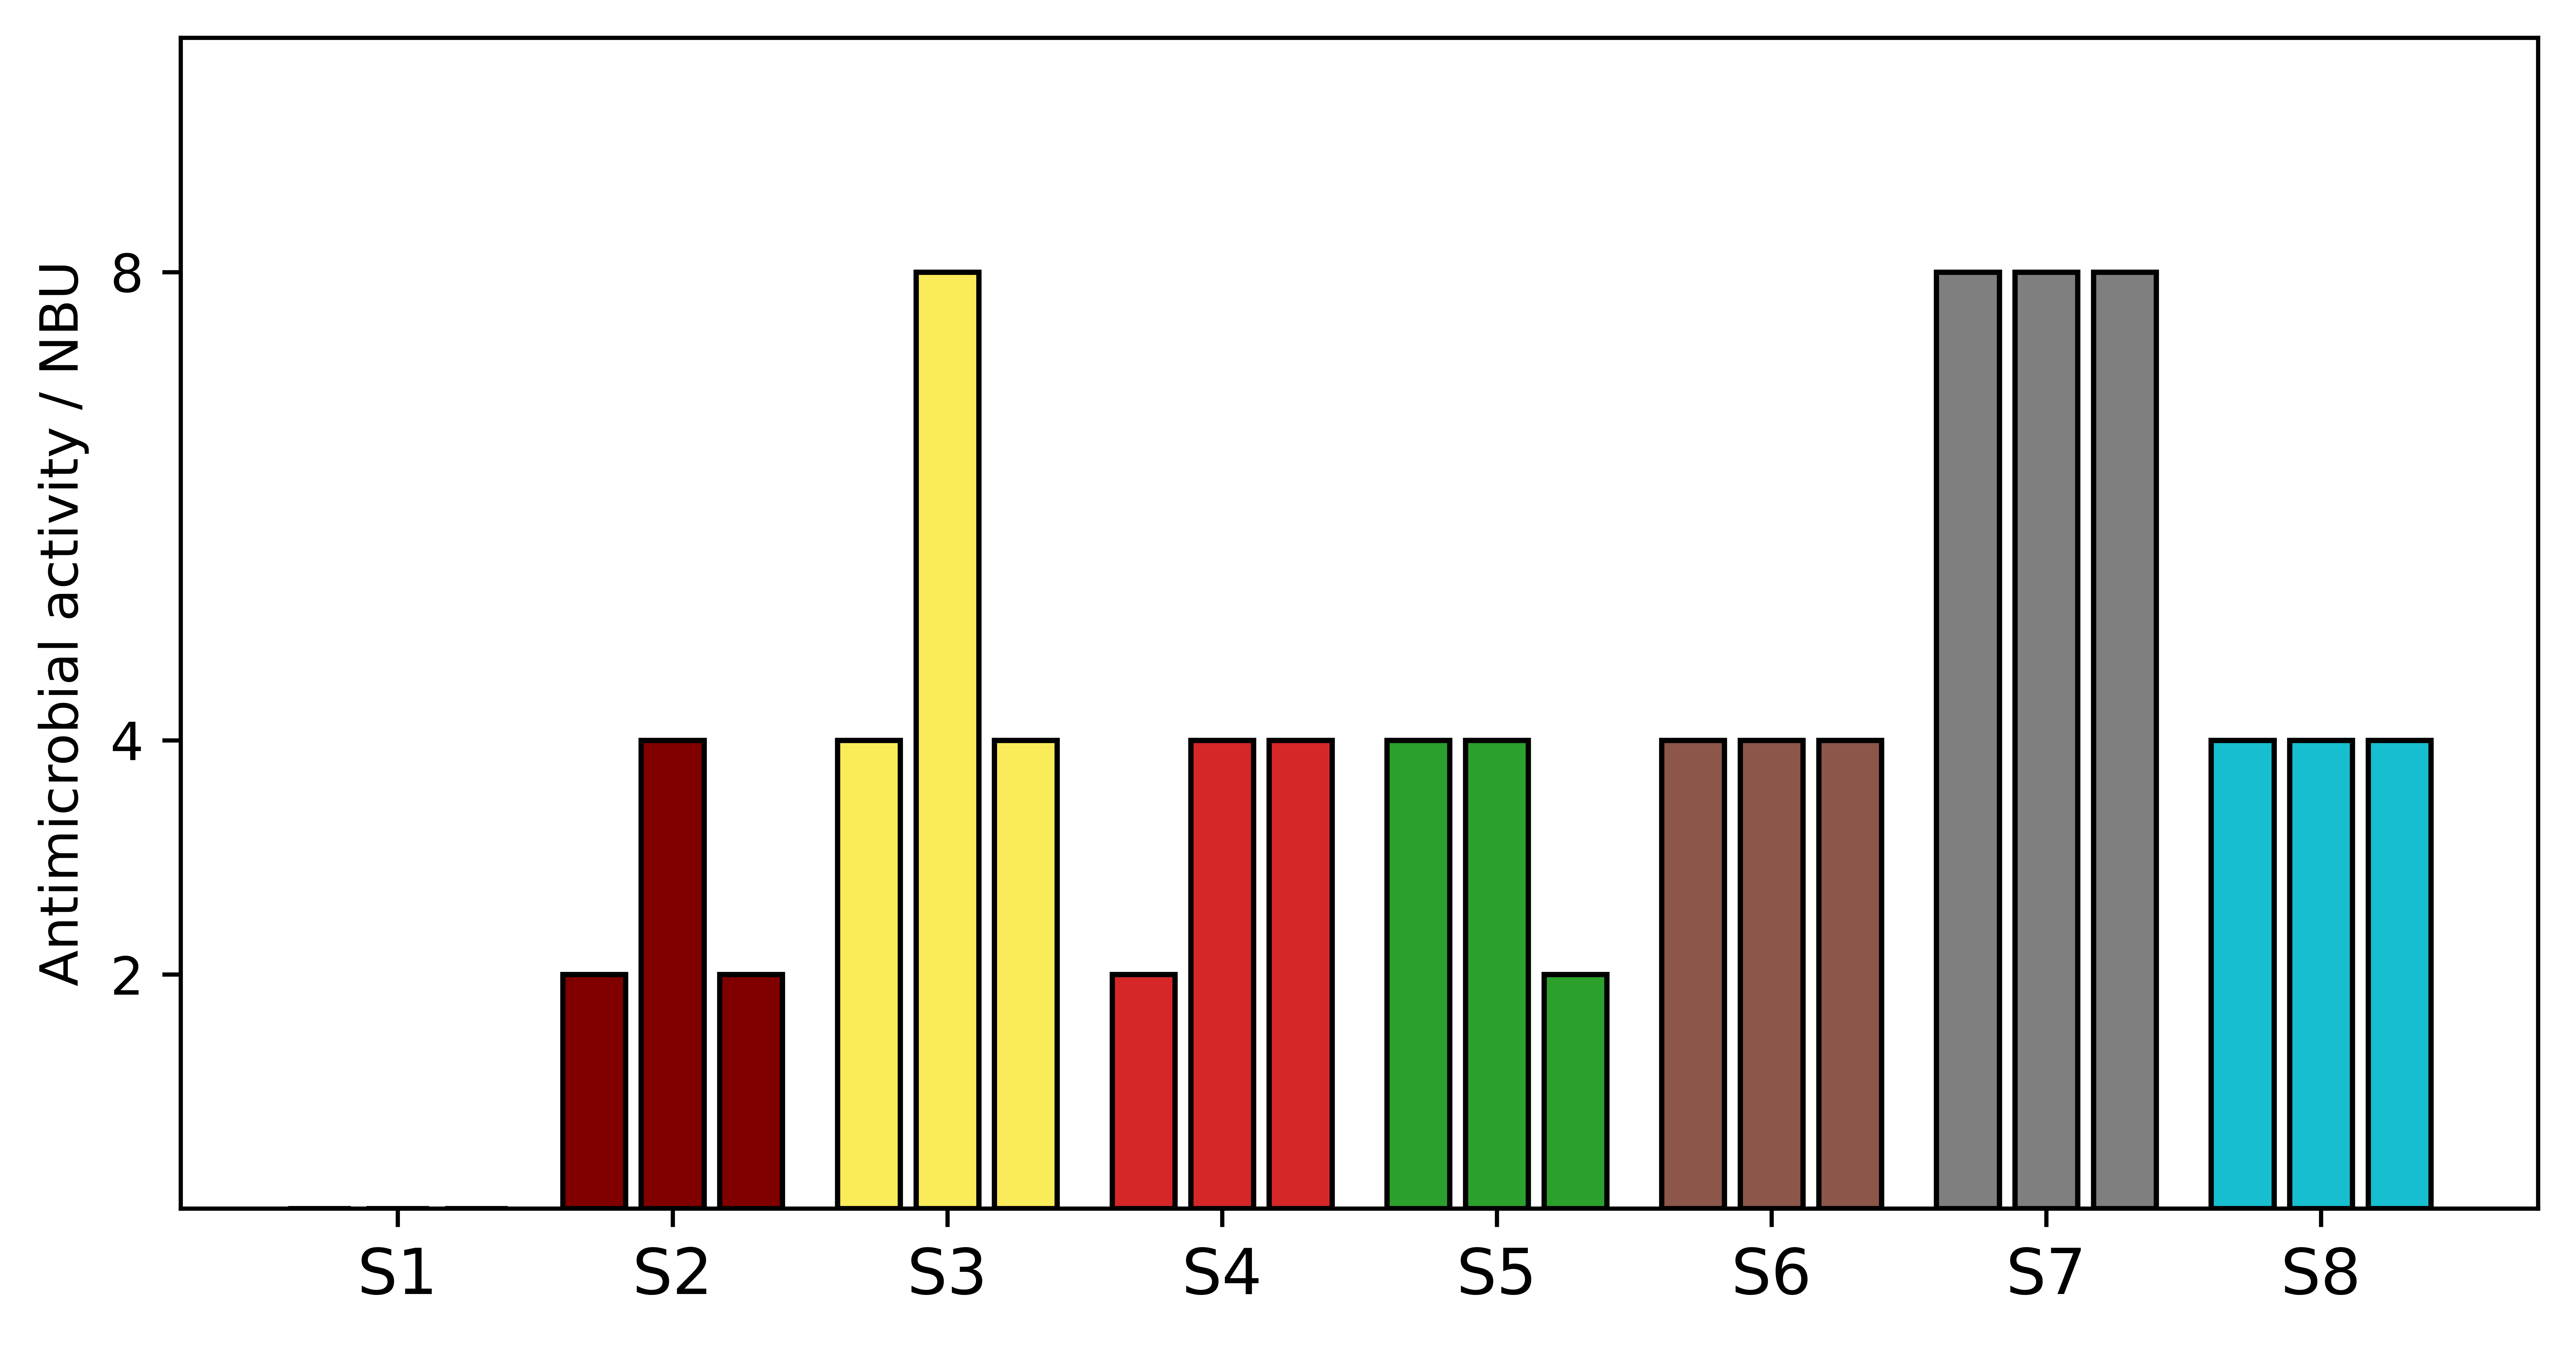

In [7]:
#example for custom visualisation (not edited to fit this specific dataset)

fig, ax = plt.subplots(figsize=(8,4),dpi=1200)

color = ['#023d6b','#023d6b','#023d6b','maroon','maroon','maroon','#faeb5a','#faeb5a','#faeb5a',
         'tab:red','tab:red','tab:red','tab:green','tab:green','tab:green','tab:brown','tab:brown','tab:brown',
         'tab:gray','tab:gray','tab:gray','tab:cyan','tab:cyan','tab:cyan','#adbde3','#adbde3','#adbde3',
         '#af82b9','#af82b9','#af82b9','tab:blue','tab:blue','tab:blue','tab:orange','tab:orange','tab:orange',
         'tab:purple','tab:purple','tab:purple','tab:pink','tab:pink','tab:pink',
         'tab:olive','tab:olive','tab:olive','coral','coral','coral']

labels = ['S1','S2','S3','S4','S5','S6','S7','S8']

#x=numpy.arange(len(BU_list))
x=numpy.array([0,1,2,3.5,4.5,5.5,7,8,9,10.5,11.5,12.5,14,15,16,17.5,18.5,19.5,21,22,23,24.5,25.5,26.5])

ax.bar(x, BU_list['BU'], edgecolor='black', color=color)
ax.set_ylim(0, 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel('Antimicrobial activity / NBU')
ax.set_yticks([2,4,8])
ax.set_xticks([1,4.5,8,11.5,15,18.5,22,25.5])
ax.set_xticklabels(labels, rotation=0,
                    fontdict = {'fontsize': 12})

save_path = pathlib.Path('BU.png')
#pyplot.savefig(save_path,dpi=600,  bbox_inches="tight")

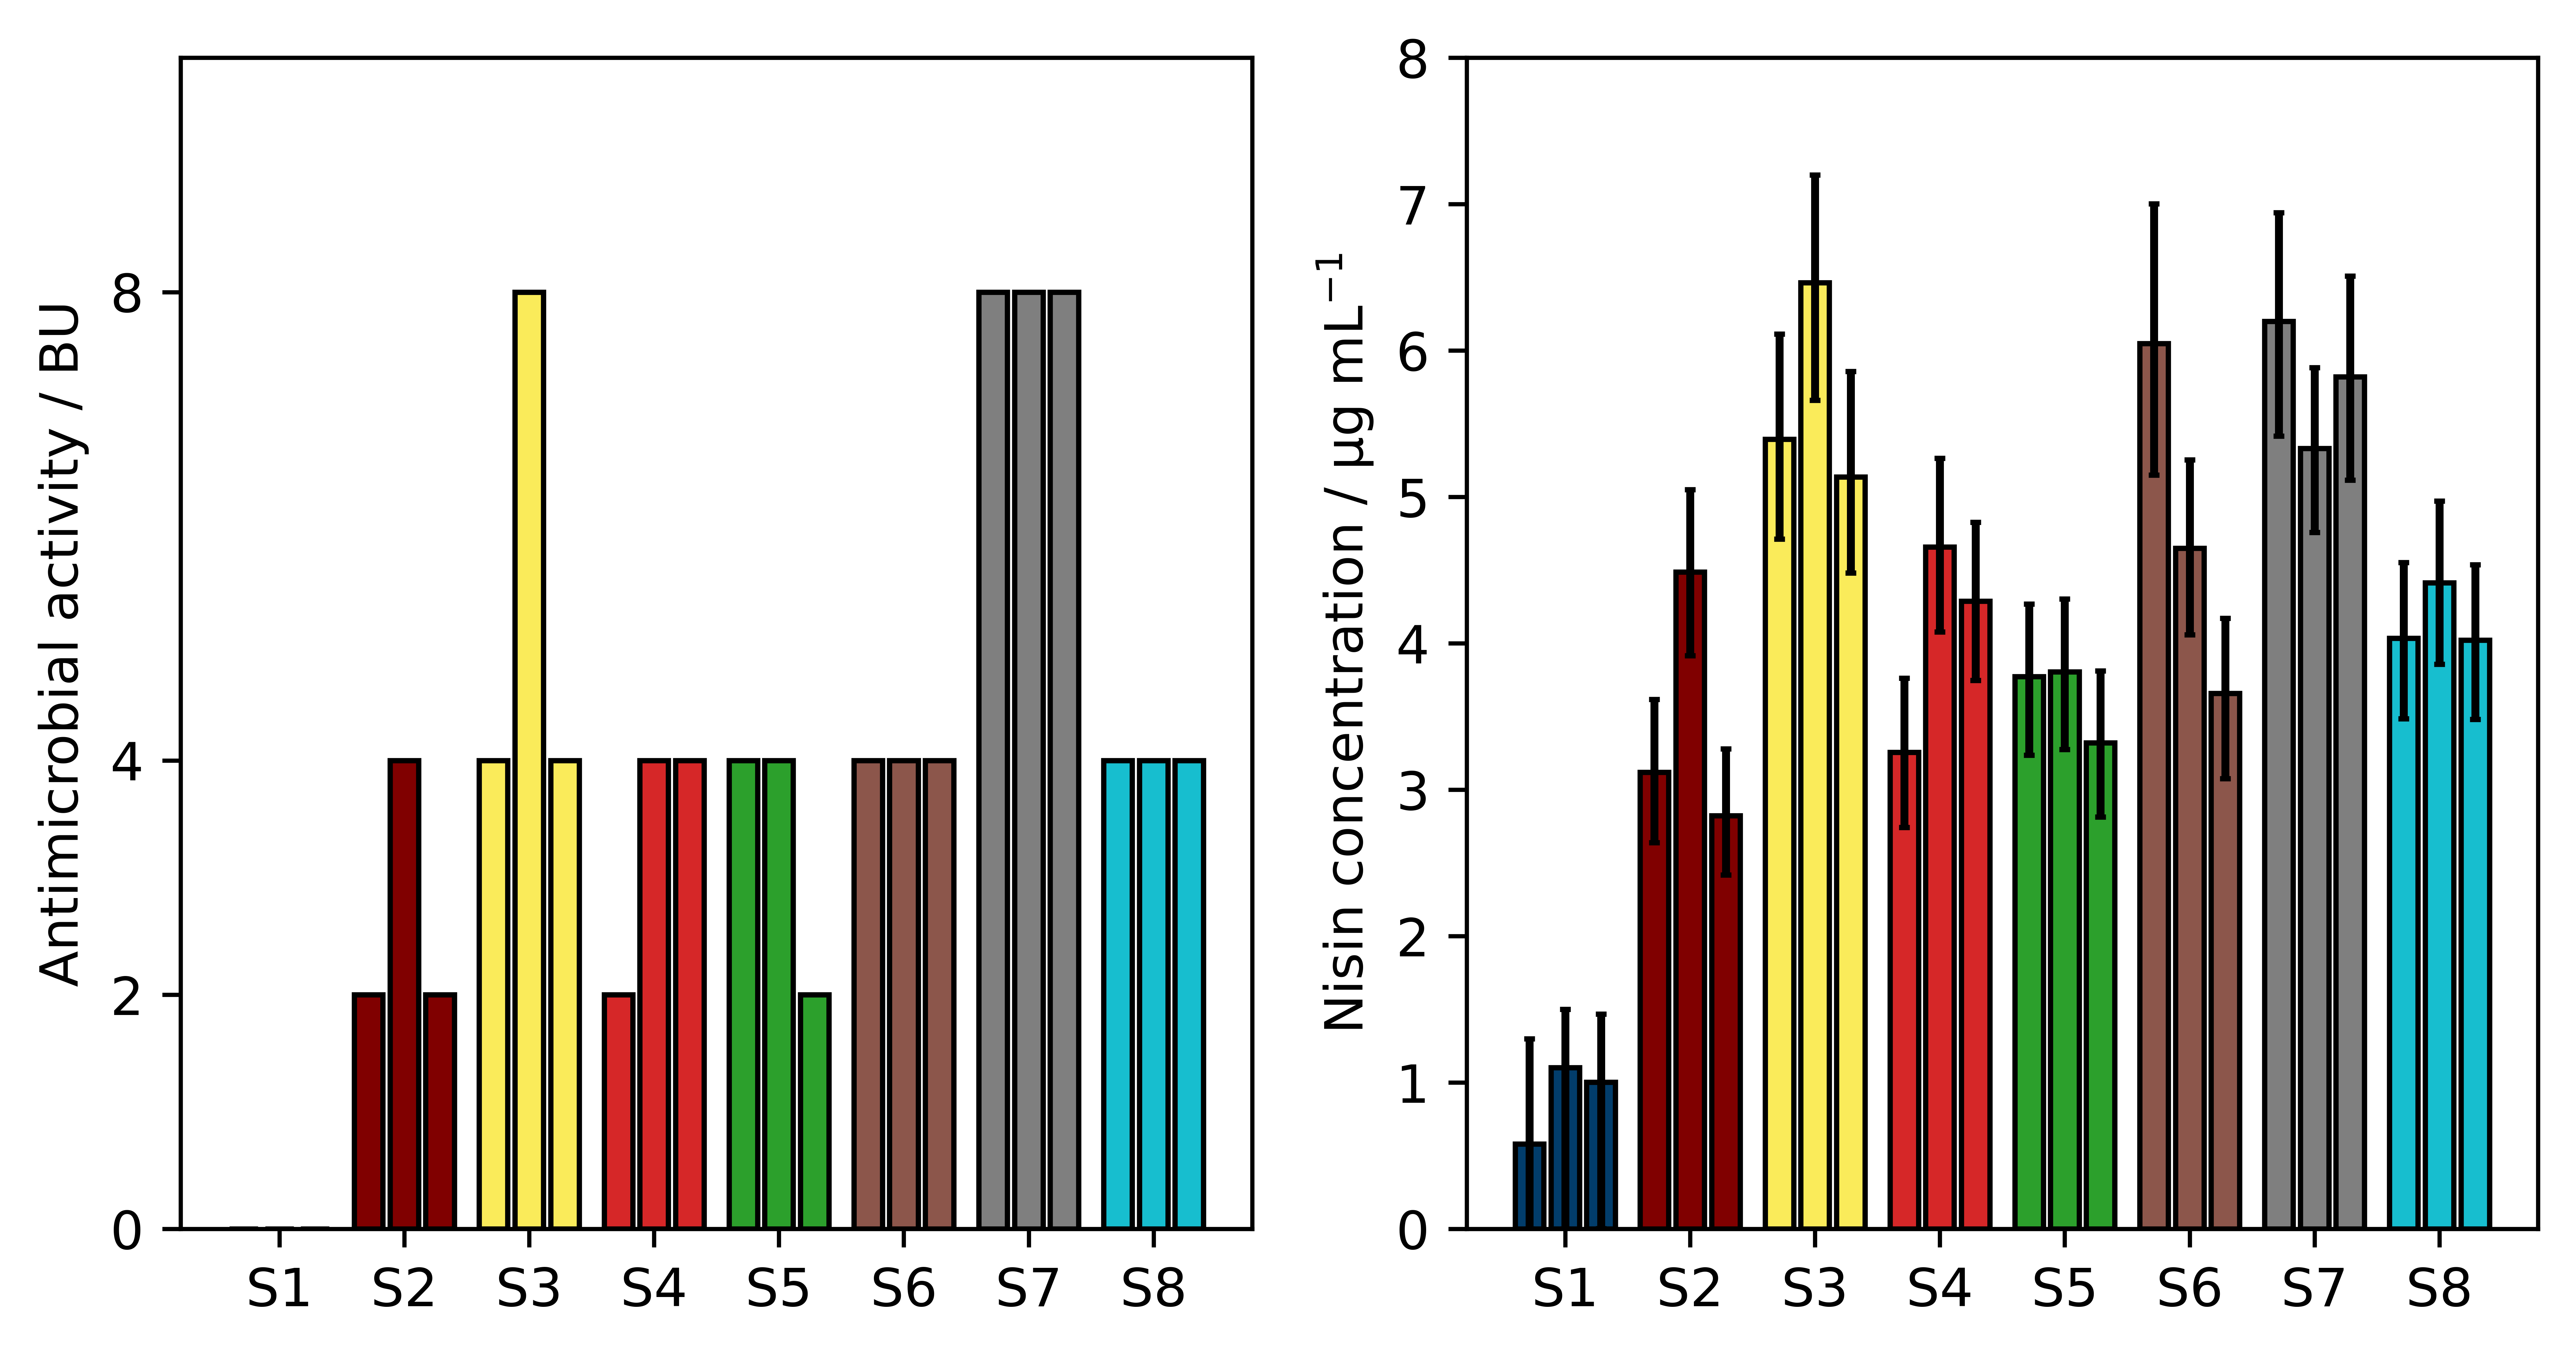

In [11]:
#example for custom visualisation (not edited to fit this specific dataset)

fig, ax = plt.subplots(1,2,figsize=(8,4),dpi=1200)

color = ['#023d6b','#023d6b','#023d6b','maroon','maroon','maroon','#faeb5a','#faeb5a','#faeb5a',
         'tab:red','tab:red','tab:red','tab:green','tab:green','tab:green','tab:brown','tab:brown','tab:brown',
         'tab:gray','tab:gray','tab:gray','tab:cyan','tab:cyan','tab:cyan','#adbde3','#adbde3','#adbde3',
         '#af82b9','#af82b9','#af82b9','tab:blue','tab:blue','tab:blue','tab:orange','tab:orange','tab:orange',
         'tab:purple','tab:purple','tab:purple','tab:pink','tab:pink','tab:pink',
         'tab:olive','tab:olive','tab:olive','coral','coral','coral']


labels = ['S1','S2','S3','S4','S5','S6','S7','S8']

x=numpy.array([0,1,2,3.5,4.5,5.5,7,8,9,10.5,11.5,12.5,14,15,16,17.5,18.5,19.5,21,22,23,24.5,25.5,26.5])

ax[1].bar(x, df_median_min_max_sorted_index['median'], yerr=[df_median_min_max_sorted_index['y_err_min'],df_median_min_max_sorted_index['y_err_max']], capsize=1, edgecolor='black', color=color)
ax[1].set_ylim(0, 8)
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].set_ylabel('Nisin concentration / µg mL$^{-1}$')

ax[1].set_xticks([1,4.5,8,11.5,15,18.5,22,25.5])
ax[1].set_xticklabels(labels, rotation=0)
#                     fontdict = {'fontsize': 12})


ax[0].bar(x, BU_list['BU'], edgecolor='black', color=color)
ax[0].set_ylim(0, 10)
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].set_ylabel('Antimicrobial activity / BU')
ax[0].set_yticks([0,2,4,8])
ax[0].set_xticks([1,4.5,8,11.5,15,18.5,22,25.5])
ax[0].set_xticklabels(labels, rotation=0)
                    #fontdict = {'fontsize': 12})

save_path = pathlib.Path('calibr8_comparison.pdf')
#pyplot.savefig(save_path,bbox_inches="tight")